In [21]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [33]:
train_df = pd.read_csv("titanic.csv")
train_df 

,PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked
1\t0\t3\tBraund,Mr. Owen Harris\tmale\t22\t1\t0\tA/5 21171\t7...
2\t1\t1\tCumings,Mrs. John Bradley (Florence Briggs Thayer)\tf...
3\t1\t3\tHeikkinen,Miss. Laina\tfemale\t26\t0\t0\tSTON/O2. 31012...
4\t1\t1\tFutrelle,Mrs. Jacques Heath (Lily May Peel)\tfemale\t3...
5\t0\t3\tAllen,Mr. William Henry\tmale\t35\t0\t0\t373450\t8....
...,...
309\t0\t2\tAbelson,Mr. Samuel\tmale\t30\t1\t0\tP/PP 3381\t24\t\tC
310\t1\t1\tFrancatelli,Miss. Laura Mabel\tfemale\t30\t0\t0\tPC 17485...
311\t1\t1\tHays,Miss. Margaret Bechstein\tfemale\t24\t0\t0\t1...
312\t1\t1\tRyerson,Miss. Emily Borie\tfemale\t18\t2\t2\tPC 17608...


In [34]:
print(train_df.columns.values)


['PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked']


In [35]:

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 1	0	3	Braund to 313	0	2	Lahtinen
Data columns (total 1 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked  313 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [36]:
train_df.describe()


,PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked
count,313
unique,313
top,Mr. Owen Harris\tmale\t22\t1\t0\tA/5 21171\t7...
freq,1


In [37]:
train_df.head(8)



,PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked
1\t0\t3\tBraund,Mr. Owen Harris\tmale\t22\t1\t0\tA/5 21171\t7...
2\t1\t1\tCumings,Mrs. John Bradley (Florence Briggs Thayer)\tf...
3\t1\t3\tHeikkinen,Miss. Laina\tfemale\t26\t0\t0\tSTON/O2. 31012...
4\t1\t1\tFutrelle,Mrs. Jacques Heath (Lily May Peel)\tfemale\t3...
5\t0\t3\tAllen,Mr. William Henry\tmale\t35\t0\t0\t373450\t8....
6\t0\t3\tMoran,Mr. James\tmale\t\t0\t0\t330877\t8.4583\t\tQ
7\t0\t1\tMcCarthy,Mr. Timothy J\tmale\t54\t0\t0\t17463\t51.8625...
8\t0\t3\tPalsson,Master. Gosta Leonard\tmale\t2\t3\t1\t349909\...


In [27]:
train_df.describe(include=['O'])


,PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked
count,313
unique,313
top,Mr. Owen Harris\tmale\t22\t1\t0\tA/5 21171\t7...
freq,1


In [32]:
g = sns.FacetGrid(train_df, col='tSurvived')
g.map(plt.hist, 'Age', bins=20)

KeyError: 'tSurvived'

In [38]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked,0,0.0


In [39]:
train_df.columns.values

array(['PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked'],
      dtype=object)

KeyError: 'Sex'

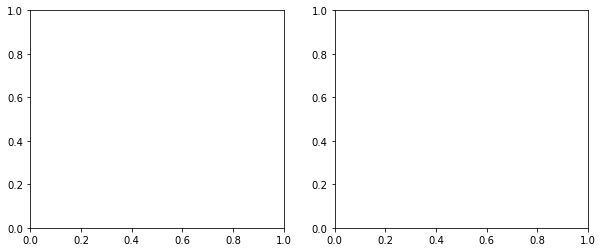

In [40]:
#age and sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [41]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

KeyError: 'Embarked'

In [42]:
sns.barplot(x='Pclass', y='Survived', data=train_df)


ValueError: Could not interpret input 'Pclass'

In [43]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

KeyError: 'Pclass'

In [44]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

NameError: name 'test_df' is not defined

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 1	0	3	Braund to 313	0	2	Lahtinen
Data columns (total 1 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked  313 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB
